In [1]:
%config completer.use_jedi = True

In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 1.1 MB/s eta 0:00:10
   - -------------------------------------- 0.5/11.5 MB 1.1 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.5 MB 745.8 kB/s eta 0:00:15
   --- ------------------------------------ 1.0/11.5 MB 883.6 kB/s eta 0:00:12
   ---- ----------------------------------- 1.3/11.5 MB 959.4 kB/s eta 0:00:11
   ----- ---------------------------------- 1.6/11.5 MB 1.1 MB/s eta 0:00:10
   ------- -------------------------------- 2.1/11.5 MB 1.1 MB/s eta 0:00:09
   -------- ------------------------------- 2.4/11.5 MB 1.2 MB/s eta 0:00:08
   --------- ------------------------------ 2.6/11.5 MB 1.2 MB/s eta 0:00:08
   ---------- ----------------------------- 2.9/11.5 MB 1.2 MB/s eta 0:00:08
   ---


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from glob import glob

In [3]:
# extract path of male and female in crop data
fpath = glob('./crop_data/female/*.jpg')
mpath = glob ('./crop_data/male/*.jpg')

In [4]:
 # create  dataframe for the cropped data
df_female = pd.DataFrame(fpath, columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(fpath,columns=['filepath'])
df_male['gender'] = 'male'
df = pd.concat((df_female, df_male),axis=0)

In [5]:
df.shape

(5408, 2)

In [6]:
# it will take each image path
# then return theeir width
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0] 

In [22]:
df['dimension'] = df['filepath'].apply(get_size) # store dimensions of image in this column

In [8]:
df.head()

,filepath,gender,dimension
0,./crop_data/female\female_0.jpg,female,273
1,./crop_data/female\female_1.jpg,female,182
2,./crop_data/female\female_100.jpg,female,122
3,./crop_data/female\female_1002.jpg,female,122
4,./crop_data/female\female_1005.jpg,female,182


 Explanatory Data analysis 
 
1.Distirbution of Male and female

    pie chart
    Bar chart
2.what distirbution of size of all images

    Histogram
    Box plot
    split by "gender"
3.Make the decision of width & height to resize using above chart

4.Remove the few images that are having very less size

In [9]:
dist_gender = df['gender'].value_counts()
dist_gender

gender
female    2704
male      2704
Name: count, dtype: int64

<Axes: ylabel='count'>

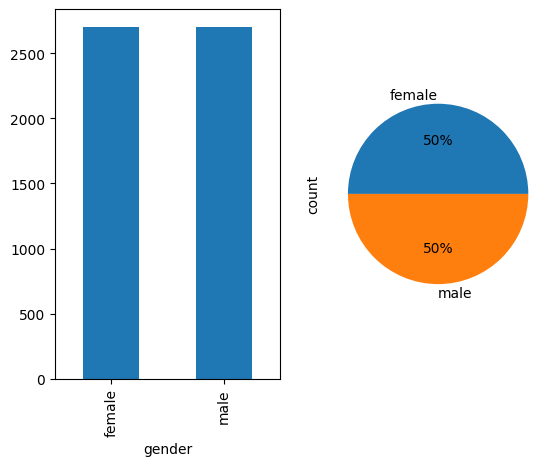

In [10]:
fig,ax = plt.subplots(nrows=1, ncols=2)
dist_gender.plot(kind='bar', ax=ax[0])
dist_gender.plot(kind='pie', ax=ax[1],autopct='%0.0f%%')

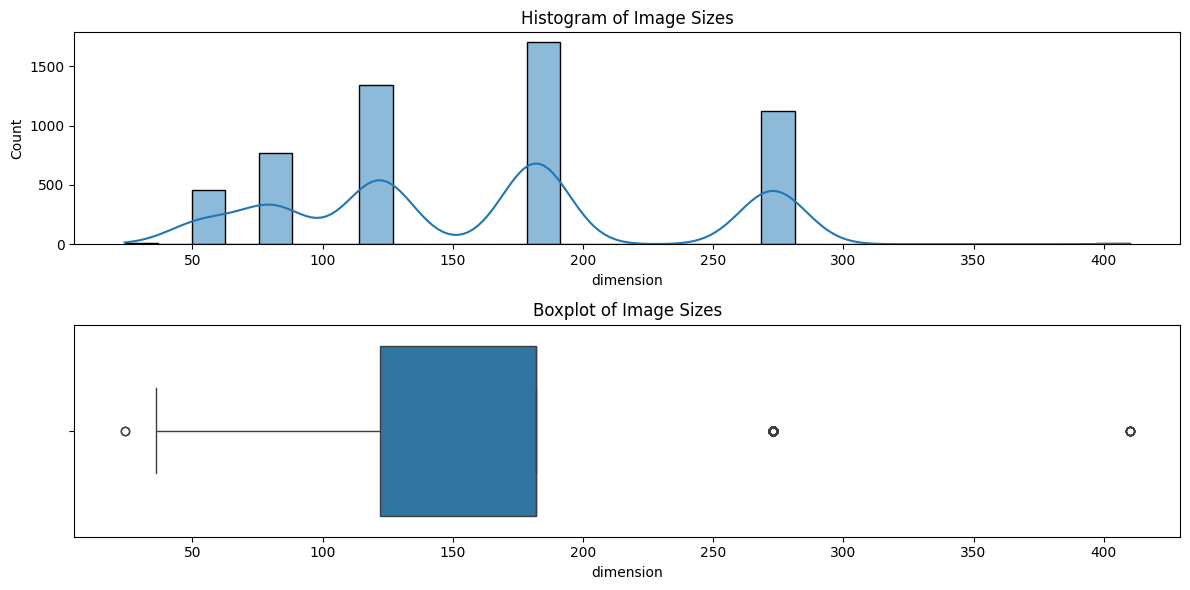

In [17]:
#what distirbution of size of all images
#Histogram
#Box plot
#split by "gender"
plt.figure(figsize=(12, 6))  # Set figure size

# Histogram
plt.subplot(2, 1, 1)
sns.histplot(df['dimension'], bins=30, kde=True)  # Add KDE for better visualization
plt.title("Histogram of Image Sizes")

# Boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=df['dimension'])  # Specify y-axis explicitly
plt.title("Boxplot of Image Sizes")

plt.tight_layout()  # Prevent overlapping
plt.show()

 

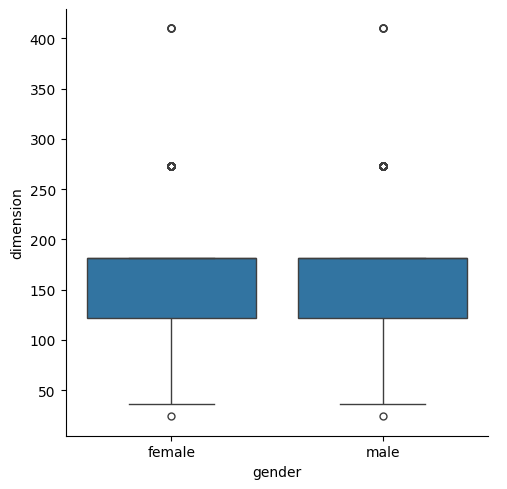

In [19]:
 sns.catplot(data = df, x = 'gender', y= 'dimension', kind = 'box')

In [21]:
# remove too small pics
df_filter = df.query('dimension >= 60')
df_filter.shape

(4942, 3)

### Structure the Image ###
     100 x 100

In [23]:
def structuring(path):
    try:
        #step-1 read image
        img = cv2.imread(path)
        # convert to greyscale
        grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # resize the images to 100 x 100
        #  cv2.Inter Area (shrink the image)
        size = grey_img.shape[0]
        if size >= 100:
            grey_resize = cv2.resize(grey_img, (100,100),cv2.INTER_AREA)
        else:
            # enlargen the image
            grey_resize = cv2.resize(grey_img, (100,100), cv2.INTER_CUBIC)
        flatten_img = grey_resize.flatten()
        return flatten_img
    except:
        return None

In [25]:
df_filter.loc[:,'data'] = df_filter['filepath'].apply(structuring) # this resizes all images to 100 x 100

In [34]:
data = df_filter['data'].apply(pd.Series)
data.columns = [f'pixel_{i}' for i in data.columns]

In [33]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9990,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999
0,188,182,182,185,174,181,192,180,217,218,...,109,111,115,116,122,116,120,119,117,110
1,32,23,31,27,28,30,28,33,36,30,...,58,47,27,34,22,27,23,37,63,18
2,49,49,35,34,42,40,35,39,71,62,...,210,230,231,237,238,230,220,212,210,208
3,132,121,118,97,85,92,91,110,155,162,...,161,111,62,62,66,81,90,100,108,113
4,234,234,234,228,231,205,122,98,74,54,...,243,243,237,237,239,237,236,241,238,240


In [35]:
 ## data normalization
data = data/255

In [39]:
data['gender'] = df_filter.gender

In [45]:
# remove missing value
data.dropna(inplace = True)
# check for null values
data.isnull().sum().sum()

np.int64(0)

### Save data for future use

In [47]:
import pickle

In [62]:
pickle.dump(data, open('./data/data_images_100_100.pickles', mode = 'wb'))